In [12]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from distribution_operation import *
from utils import *
from numerical_routine import *
from posterior_computation import *
from ash import *

In [13]:
betahat=  np.array([1,2,3,4,5])
sebetahat=np.array([1,0.4,5,1,1])

res= ash(betahat, sebetahat)

In [14]:
true_val1=  np.random.normal(loc=0, scale=2, size=100)
true_val0=  np.zeros( 100)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=100)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=100)
# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])

In [15]:
res= ash(betahat, sebetahat)
print(res.pi) 

[6.21377876e-01 6.12627932e-12 6.44757311e-12 6.38729809e-12
 6.25296315e-12 5.59050398e-12 1.02894258e-01 2.75727867e-01
 0.00000000e+00 0.00000000e+00]


nice conservative behaviour

Text(0, 0.5, 'posterior mean')

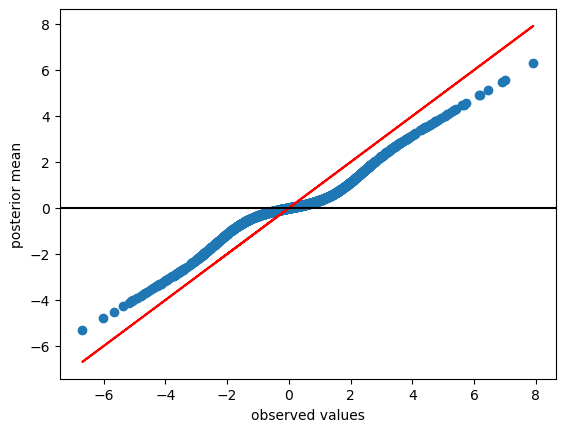

In [23]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [24]:
print( np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - betahat )**2)))
print(np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - res.post_mean  )**2)))

0.9938204503780806
0.7420687692258789


In [25]:
true_val1=  np.random.normal(loc=0, scale=2, size=1000)
true_val0=  np.zeros( 1000)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=1000)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=1000)

# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])

In [26]:
res= ash(betahat, sebetahat)
print(res.pi) 

[5.35771754e-01 7.17776867e-10 8.35815279e-11 4.09905146e-07
 5.34951709e-08 3.92500209e-10 4.64228345e-01 9.67766853e-11
 9.55294371e-11 9.80908794e-08]


in the large scale regime works well

Text(0, 0.5, 'posterior mean')

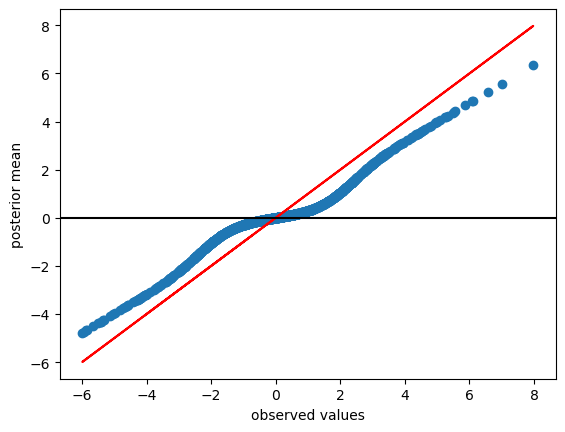

In [27]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values") 
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

Text(0, 0.5, 'posterior mean')

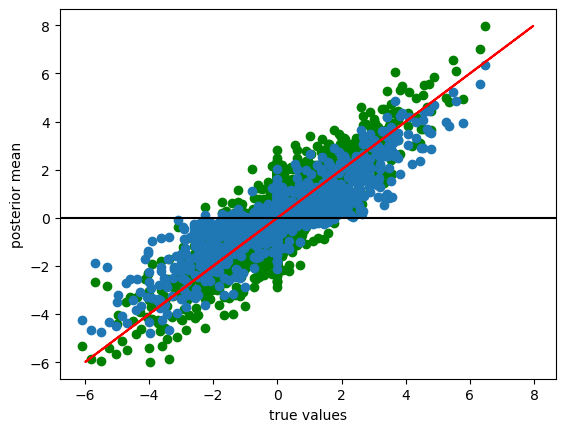

In [28]:
plt.scatter(np.concatenate((true_val1 , true_val0))    , betahat ,color="green" )
plt.scatter(np.concatenate((true_val1 , true_val0))    , res.post_mean  )
plt.xlabel("true values") 
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [29]:
print( np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - betahat )**2)))
print(np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - res.post_mean  )**2)))

0.9478237266038732
0.7419623336018188
